In [0]:

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [0]:
df = pd.read_csv('C:\\Users\\acer\\Desktop\\ml-latest-small (1)\\ml-latest-small\\final_data_new.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,userId,movieId,imdbId,title,rating,genres,Director,Plot,Cast
0,0,0,1,1,114709,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy,John Lasseter,A cowboy doll is profoundly threatened and jea...,Tom Hanks
1,1,1,5,1,114709,Toy Story (1995),4.0,Adventure|Animation|Children|Comedy|Fantasy,John Lasseter,A cowboy doll is profoundly threatened and jea...,Tom Hanks
2,2,2,7,1,114709,Toy Story (1995),4.5,Adventure|Animation|Children|Comedy|Fantasy,John Lasseter,A cowboy doll is profoundly threatened and jea...,Tom Hanks
3,3,3,15,1,114709,Toy Story (1995),2.5,Adventure|Animation|Children|Comedy|Fantasy,John Lasseter,A cowboy doll is profoundly threatened and jea...,Tom Hanks
4,4,4,17,1,114709,Toy Story (1995),4.5,Adventure|Animation|Children|Comedy|Fantasy,John Lasseter,A cowboy doll is profoundly threatened and jea...,Tom Hanks


In [0]:
movie_rating = df[['userId','movieId','rating','title']]

movie_rating.head()

,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [0]:
rating_count = (movie_rating.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'rating_count'})
     [['title', 'rating_count']]
    )
rating_count.head()

,title,rating_count
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [0]:
import matplotlib.pyplot as plt

average_movie_rating = movie_rating.groupby('title')['rating'].mean().sort_values(ascending=False)

average_movie_rating.hist(bins=20)
plt.show()

<Figure size 640x480 with 1 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000203FCF50128>]],
      dtype=object)

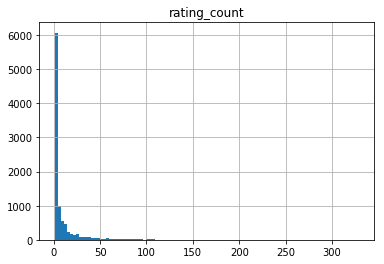

In [0]:
rating_count.hist(bins=100)

In [0]:
rating_count.shape

(9719, 2)

In [0]:
threshold = 10
rating_count = rating_count.query('rating_count >= @threshold')
rating_count.head()

,title,rating_count
6,"'burbs, The (1989)",17
8,(500) Days of Summer (2009),42
16,10 Cloverfield Lane (2016),14
18,10 Things I Hate About You (1999),54
20,"10,000 BC (2008)",17


In [0]:
rating_count.shape

(2269, 2)

In [0]:
user_rating = pd.merge(rating_count, movie_rating, left_on='title', right_on='title', how='left')
user_rating.head()

,title,rating_count,userId,movieId,rating
0,"'burbs, The (1989)",17,12,2072,5.0
1,"'burbs, The (1989)",17,19,2072,2.0
2,"'burbs, The (1989)",17,91,2072,2.0
3,"'burbs, The (1989)",17,95,2072,3.0
4,"'burbs, The (1989)",17,172,2072,4.0


In [0]:
user_count = (user_rating.
     groupby(by = ['userId'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'user_rating_count'})
     [['userId', 'user_rating_count']]
    )
user_count.head()

,userId,user_rating_count
0,1,211
1,2,26
2,3,24
3,4,179
4,5,44


In [0]:
threshold = 5
user_count = user_count.query('user_rating_count >= @threshold')
user_count.head()

,userId,user_rating_count
0,1,211
1,2,26
2,3,24
3,4,179
4,5,44


In [0]:
user_count.shape

(610, 2)

In [0]:
combined = user_rating.merge(user_count, left_on = 'userId', right_on = 'userId', how = 'inner')

In [0]:
combined.head()

,title,rating_count,userId,movieId,rating,user_rating_count
0,"'burbs, The (1989)",17,12,2072,5.0,32
1,10 Things I Hate About You (1999),54,12,2572,5.0,32
2,Beavis and Butt-Head Do America (1996),31,12,1405,3.0,32
3,Big Daddy (1999),48,12,2694,4.0,32
4,Billy Elliot (2000),37,12,3967,4.5,32


In [0]:
combined.shape

(81120, 6)

In [0]:

print('Number of unique movies: ', combined['title'].nunique())
print('Number of unique users: ', combined['userId'].nunique())

Number of unique books:  2269
Number of unique users:  610


In [0]:

scaler = MinMaxScaler()
combined['rating'] = combined['rating'].values.astype(float)
rating_scaled = pd.DataFrame(scaler.fit_transform(combined['rating'].values.reshape(-1,1)))
combined['rating'] = rating_scaled

In [0]:

combined = combined.drop_duplicates(['userId', 'title'])
user_movie_matrix = combined.pivot(index='userId', columns='title', values='rating')
user_movie_matrix.fillna(0, inplace=True)

users = user_movie_matrix.index.tolist()
movies = user_movie_matrix.columns.tolist()

user_movie_matrix = user_movie_matrix.as_matrix()

C:\Users\acer\.conda\envs\py36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


In [0]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
num_input = combined['title'].nunique()
num_hidden_1 = 10
num_hidden_2 = 5

X = tf.placeholder(tf.float64, [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1], dtype=tf.float64)),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2], dtype=tf.float64)),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1], dtype=tf.float64)),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input], dtype=tf.float64)),
}

biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2], dtype=tf.float64)),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1], dtype=tf.float64)),
    'decoder_b2': tf.Variable(tf.random_normal([num_input], dtype=tf.float64)),
}

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

In [0]:
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

y_pred = decoder_op

y_true = X

In [0]:
loss = tf.losses.mean_squared_error(y_true, y_pred)
optimizer = tf.train.RMSPropOptimizer(0.03).minimize(loss)
eval_x = tf.placeholder(tf.int32, )
eval_y = tf.placeholder(tf.int32, )
pre, pre_op = tf.metrics.precision(labels=eval_x, predictions=eval_y)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [0]:
init = tf.global_variables_initializer()
local_init = tf.local_variables_initializer()
pred_data = pd.DataFrame()

In [0]:
with tf.Session() as session:
    epochs = 50
    batch_size = 30

    session.run(init)
    session.run(local_init)

    num_batches = int(user_movie_matrix.shape[0] / batch_size)
    user_movie_matrix = np.array_split(user_movie_matrix, num_batches)
    
    for i in range(epochs):

        avg_cost = 0
        for batch in user_movie_matrix:
            _, l = session.run([optimizer, loss], feed_dict={X: batch})
            avg_cost += l

        avg_cost /= num_batches

        print("epoch: {} Loss: {}".format(i + 1, avg_cost))

    user_movie_matrix = np.concatenate(user_movie_matrix, axis=0)

    preds = session.run(decoder_op, feed_dict={X: user_movie_matrix})

    pred_data = pred_data.append(pd.DataFrame(preds))

    pred_data = pred_data.stack().reset_index(name='rating')
    pred_data.columns = ['userId', 'title', 'rating']
    pred_data['userId'] = pred_data['userId'].map(lambda value: users[value])
    pred_data['title'] = pred_data['title'].map(lambda value: movies[value])
    
    keys = ['userId', 'title']
    index_1 = pred_data.set_index(keys).index
    index_2 = combined.set_index(keys).index

    top_ten_ranked = pred_data[~index_1.isin(index_2)]
    top_ten_ranked = top_ten_ranked.sort_values(['userId', 'rating'], ascending=[True, False])
    top_ten_ranked = top_ten_ranked.groupby('userId').head(10)

epoch: 1 Loss: 0.3566294640302658
epoch: 2 Loss: 0.35631317645311356
epoch: 3 Loss: 0.35540677011013033
epoch: 4 Loss: 0.35282173603773115
epoch: 5 Loss: 0.34563793838024137
epoch: 6 Loss: 0.3253474161028862
epoch: 7 Loss: 0.2859171450138092
epoch: 8 Loss: 0.2553128905594349
epoch: 9 Loss: 0.20599933564662934
epoch: 10 Loss: 0.11966659650206565
epoch: 11 Loss: 0.047567164339125154
epoch: 12 Loss: 0.029217723477631807
epoch: 13 Loss: 0.027260448969900607
epoch: 14 Loss: 0.02663930142298341
epoch: 15 Loss: 0.026033513620495795
epoch: 16 Loss: 0.025533758290112018
epoch: 17 Loss: 0.02513673361390829
epoch: 18 Loss: 0.024818352051079275
epoch: 19 Loss: 0.024564562272280453
epoch: 20 Loss: 0.02436711536720395
epoch: 21 Loss: 0.024194792658090592
epoch: 22 Loss: 0.024112188164144753
epoch: 23 Loss: 0.023938195221126078
epoch: 24 Loss: 0.02385468315333128
epoch: 25 Loss: 0.02373692747205496
epoch: 26 Loss: 0.023659514728933573
epoch: 27 Loss: 0.023561304714530707
epoch: 28 Loss: 0.02358618238

In [0]:
top_ten_ranked.loc[top_ten_ranked['userId'] == 130]

,userId,title,rating
293466,130,Forrest Gump (1994),0.336138
294525,130,"Silence of the Lambs, The (1991)",0.252352
294452,130,Schindler's List (1993),0.206936
293493,130,"Fugitive, The (1993)",0.198606
293988,130,"Matrix, The (1999)",0.180974
293801,130,Jurassic Park (1993),0.175062
294707,130,Terminator 2: Judgment Day (1991),0.148845
293894,130,"Lion King, The (1994)",0.139853
294626,130,Star Wars: Episode IV - A New Hope (1977),0.139460
293734,130,Independence Day (a.k.a. ID4) (1996),0.128739


In [0]:
movie_rating.loc[movie_rating['userId'] == 130].sort_values(by=['rating'], ascending=False)[:10]

,userId,movieId,rating,title
8723,130,318,5.0,"Shawshank Redemption, The (1994)"
3439,130,110,5.0,Braveheart (1995)
7646,130,292,5.0,Outbreak (1995)
6097,130,225,5.0,Disclosure (1994)
6223,130,231,4.0,Dumb & Dumber (Dumb and Dumber) (1994)
9517,130,344,4.0,Ace Ventura: Pet Detective (1994)
11617,130,410,4.0,Addams Family Values (1993)
7926,130,296,4.0,Pulp Fiction (1994)
6699,130,253,4.0,Interview with the Vampire: The Vampire Chroni...
9362,130,339,4.0,While You Were Sleeping (1995)
